In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/var/folders/sx/rybvq68145n15r0k_ggr9pn00000gn/T/ipykernel_6295/511043582.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
test_PassengerId=test_df["PassengerId"]

Data Dictionary

Variable	Definition	            Key

survival	Survival	            0 = No, 1 = Yes

pclass	    Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd

sex      	Sex	

Age	        Age in years	

sibsp	    # of siblings / spouses aboard the Titanic	

parch	    # of parents / children aboard the Titanic	

ticket	    Ticket number	

fare	    Passenger fare	

cabin	    Cabin number	

embarked	Port of Embarkation	     C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
test_PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


float64(2): Fare ve Age

int64(5): Pclass, sibsp, parch, passengerId and survived

object(5): Cabin, embarked, ticket, name and sex

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Univariate Variable Analysis

Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
    
Numerical Variable: Fare, age and passengerId

# Categorical Variable

In [11]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

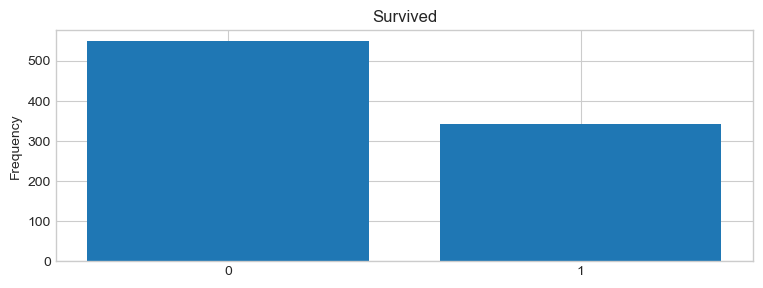

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


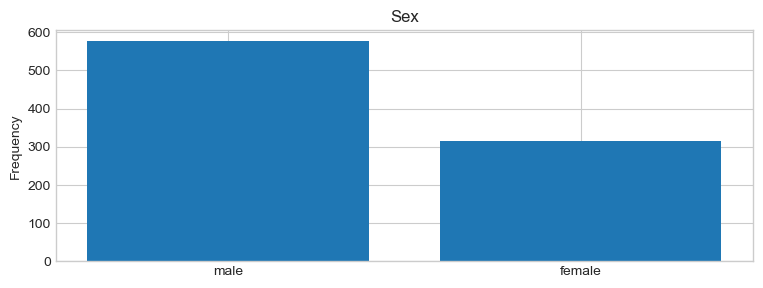

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


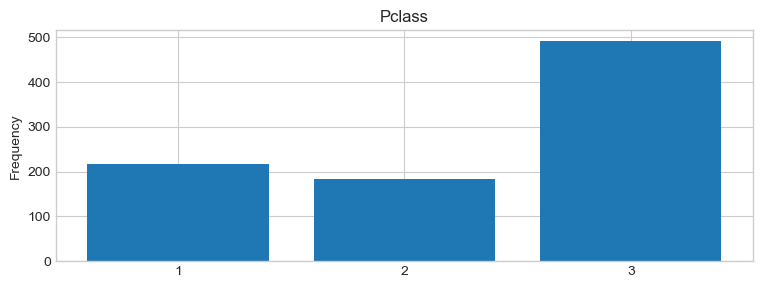

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


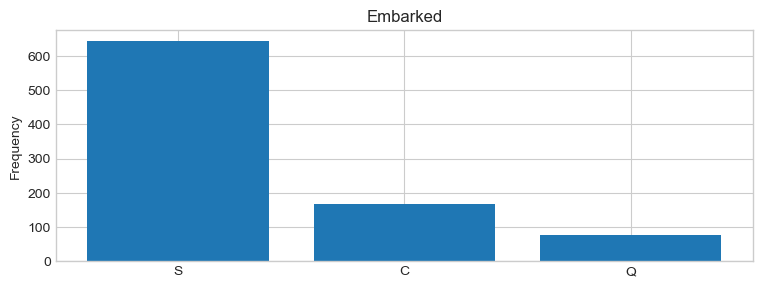

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


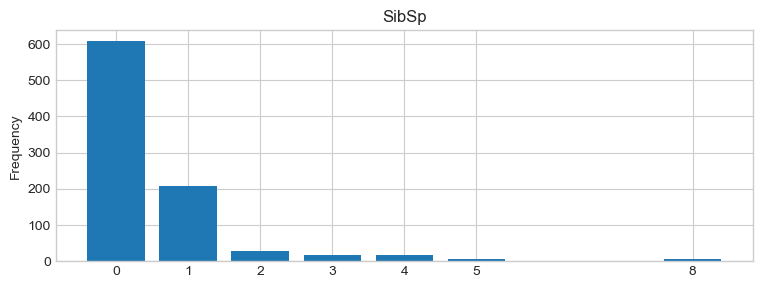

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


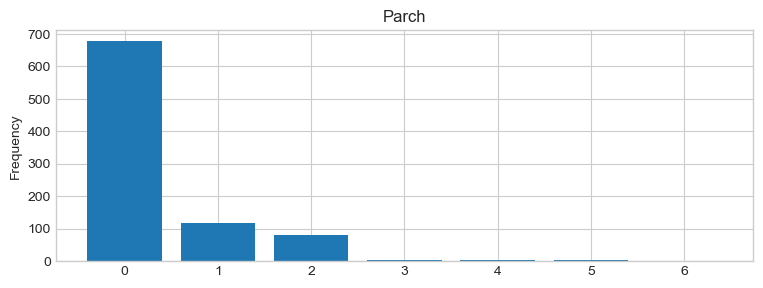

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [12]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [13]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



# Numerical Variable

In [14]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel("variable")
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

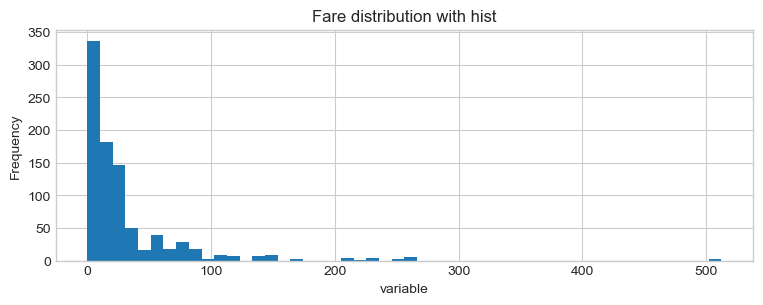

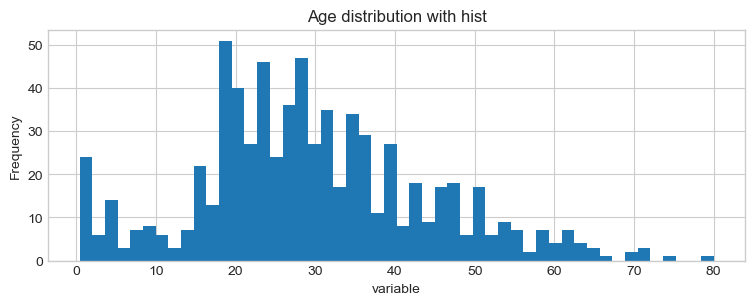

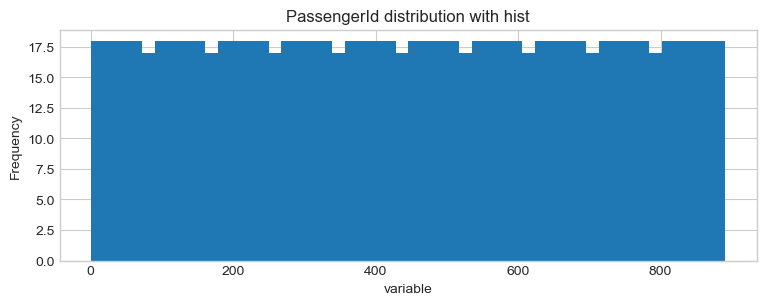

In [15]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic Data Analysis

In [16]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outliers

In [20]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col) #list 
    
    outlier_indices = Counter(outlier_indices)  #hangi yolcu birden fazla outlier içeriyor
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

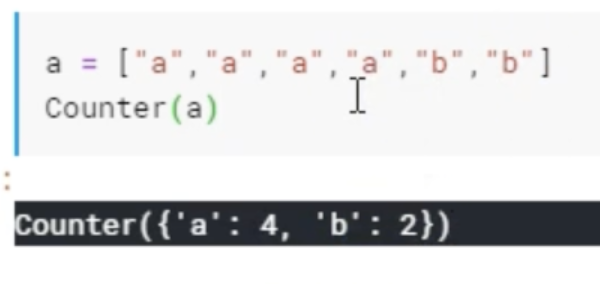

In [21]:
#counter example

from IPython.display import display
from PIL import Image

# Fotoğrafı yükleme
img = Image.open("counter.png")

# Fotoğrafı görüntüleme
display(img)

In [22]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [23]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [24]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Find Missing Value

In [25]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [26]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [27]:
#Find missing value NAN
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [28]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [29]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [30]:
train_df.Embarked.value_counts()

S    904
C    270
Q    123
Name: Embarked, dtype: int64

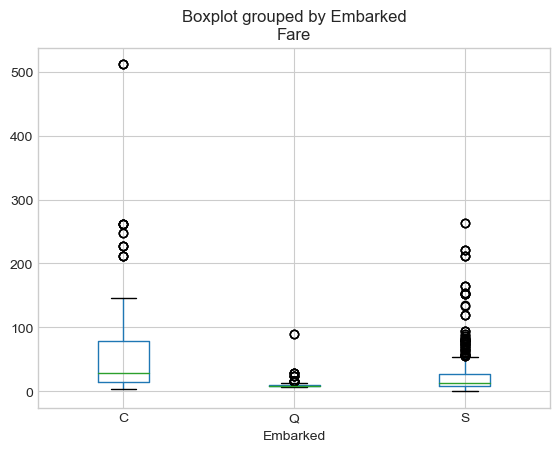

In [31]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

# Fill Missing Value

In [32]:
#neden c ile doldurduk Fare datasında 80 e yakın Peki embarked da 80 e yakın olan C oluyor mantıklı olan c ile doldurmak
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [33]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [34]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [35]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [36]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

# Visualization

Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived



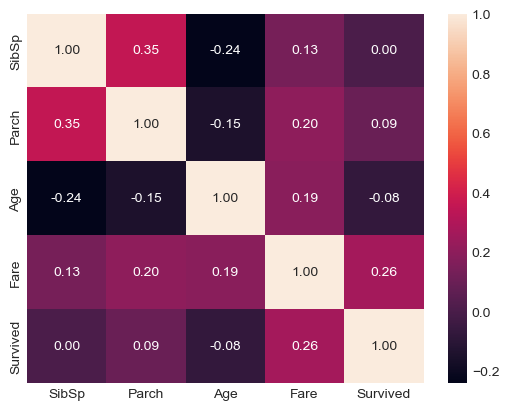

In [37]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

#Fare feature seems to have correlation with survived feature (0.26).

# SibSp -- Survived¶


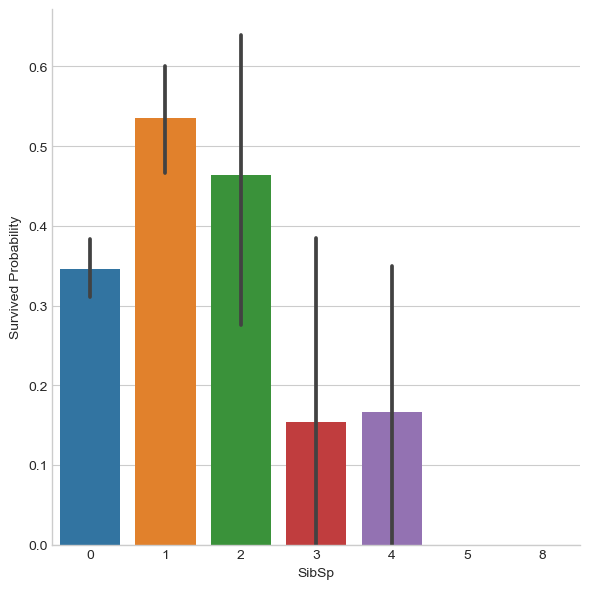

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()

Having a lot of SibSp have less chance to survive.

if sibsp == 0 or 1 or 2, passenger has more chance to survive

we can consider a new feature describing these categories.

# Parch -- Survived


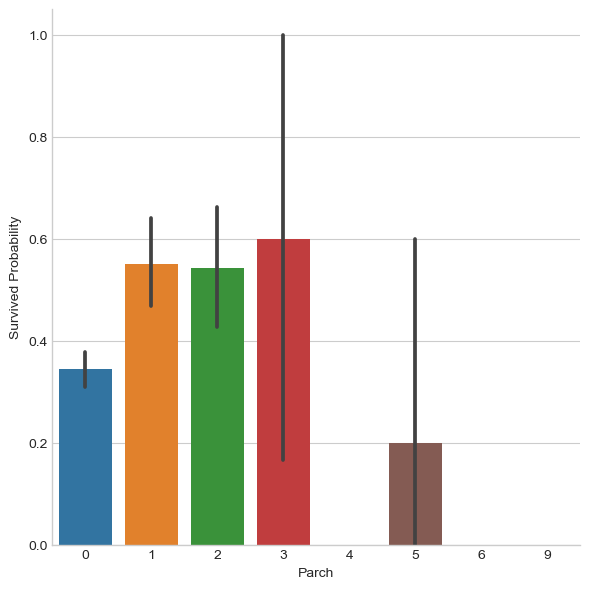

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x="Parch", y="Survived", kind="bar", data=train_df, height=6)
g.set_ylabels("Survived Probability")
plt.show()

Sibsp and parch can be used for new feature extraction with th = 3

small familes have more chance to survive.

there is a std in survival of passenger with parch = 3

# Pclass -- Survived


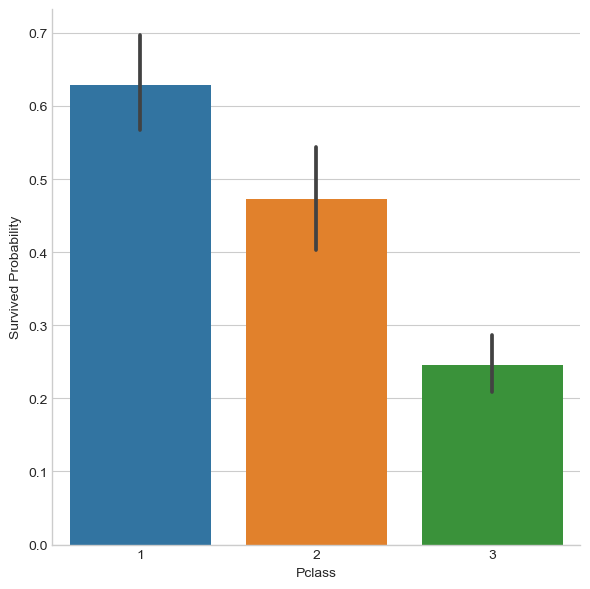

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar", height=6)
g.set_ylabels("Survived Probability")
plt.show()


# Age -- Survived


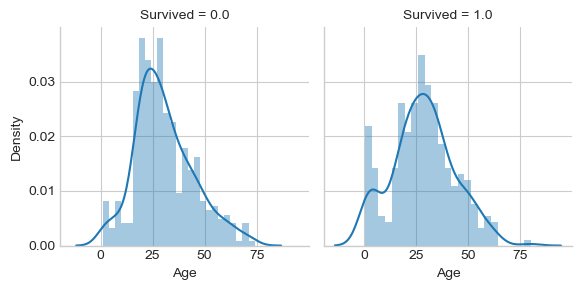

In [41]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

age <= 10 has a high survival rate,

oldest passengers (80) survived,

large number of 20 years old did not survive,

most passengers are in 15-35 age range,

use age feature in training

use age distribution for missing value of age

# Pclass -- Survived -- Age


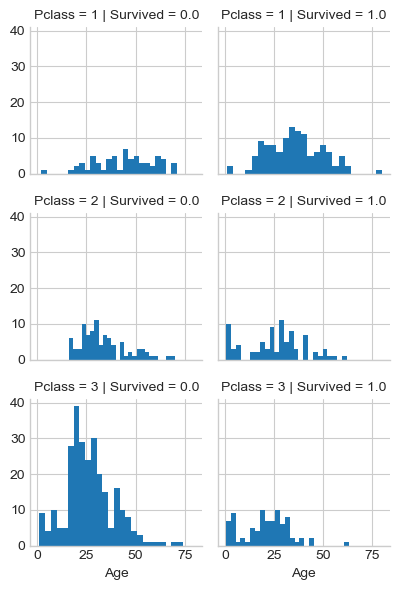

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(train_df, col="Survived", row="Pclass", height=2)
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

pclass is important feature for model training.


# Embarked -- Sex -- Pclass -- Survived


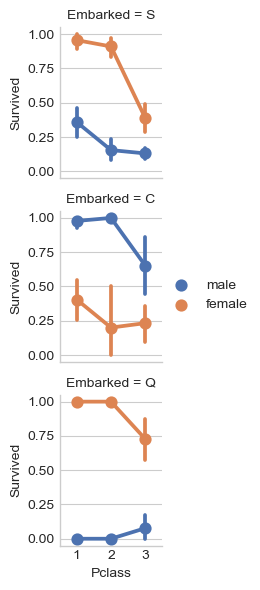

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(train_df, row="Embarked", height=2)
g.map(sns.pointplot, "Pclass", "Survived", "Sex", palette="deep")
g.add_legend()
plt.show()


Female passengers have much better survival rate than males.

males have better survşval rate in pclass 3 in C.

embarked and sex will be used in training.

# Fill Missing: Age Feature

In [44]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


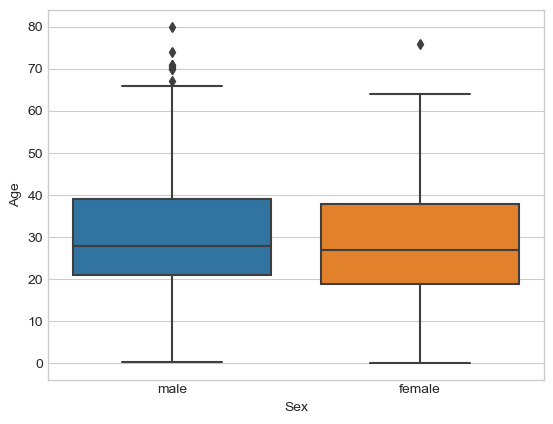

In [45]:
sns.boxplot(x="Sex", y="Age", data=train_df)
plt.show()

Sex is not informative for age prediction, age distribution seems to be same.

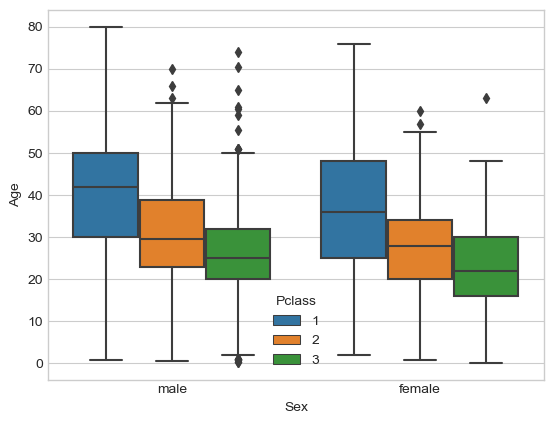

In [46]:
sns.boxplot(x="Sex", y="Age", hue="Pclass", data=train_df)
plt.show()

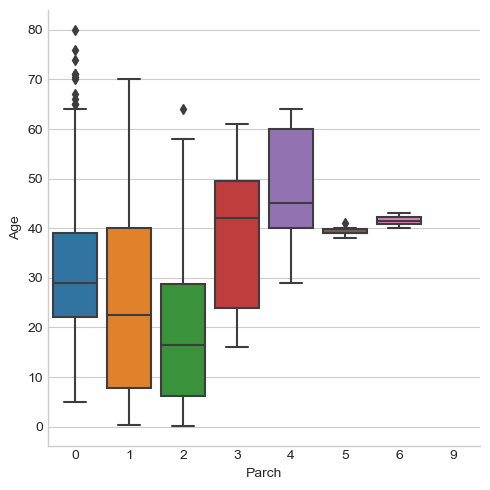

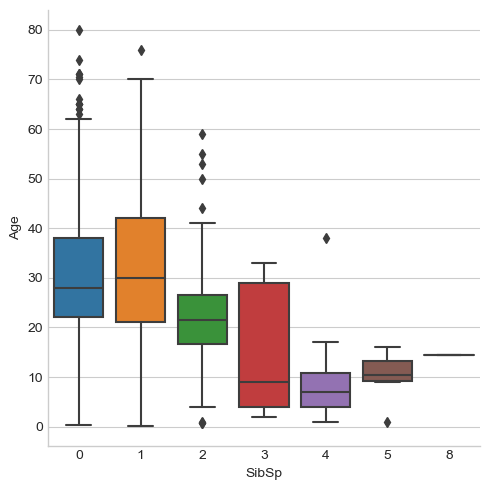

In [47]:
sns.catplot(x="Parch", y="Age", data=train_df, kind="box")
sns.catplot(x="SibSp", y="Age", data=train_df, kind="box")
plt.show()

In [48]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

1st class passengers are older than 2nd, and 2nd is older than 3rd class.



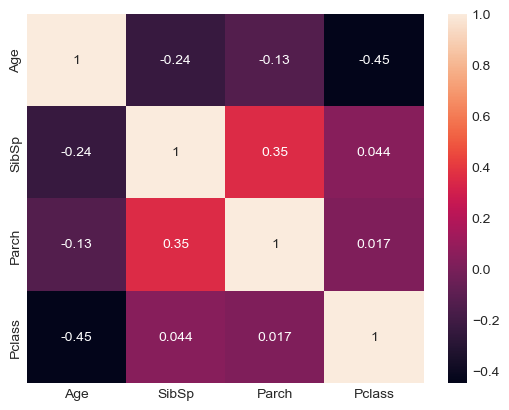

In [49]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

# Feature Engineering

In [50]:
#Name Title

train_df["Name"]  #isimlerini tutuyor 

#burada biz isimlere göre hayatta kalıp kalmadığını anlayamayız

# O yüzden Mr Ms gibi title lara bakarak hayatta kalıp kalmadığına bakabiliriz

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1294                                   Spector, Mr. Woolf
1295                         Oliva y Ocana, Dona. Fermina
1296                         Saether, Mr. Simon Sivertsen
1297                                  Ware, Mr. Frederick
1298                             Peter, Master. Michael J
Name: Name, Length: 1299, dtype: object

In [51]:
#peki Mr Ms gibi unvanları nasıl ayırırız.

name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [52]:
train_df["Title"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1294        Mr
1295      Dona
1296        Mr
1297        Mr
1298    Master
Name: Title, Length: 1299, dtype: object

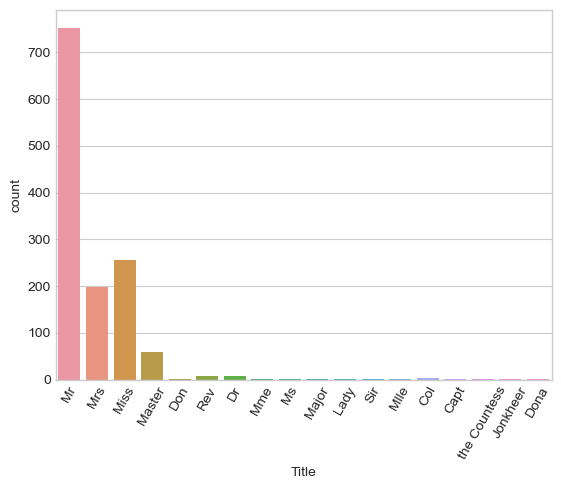

In [53]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [54]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,Mr
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1297,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,Mr


In [55]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

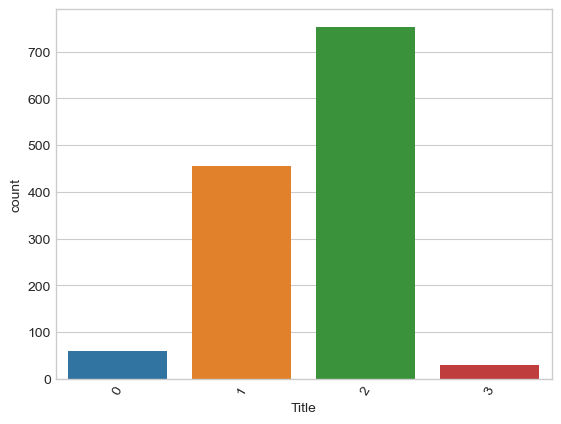

In [56]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

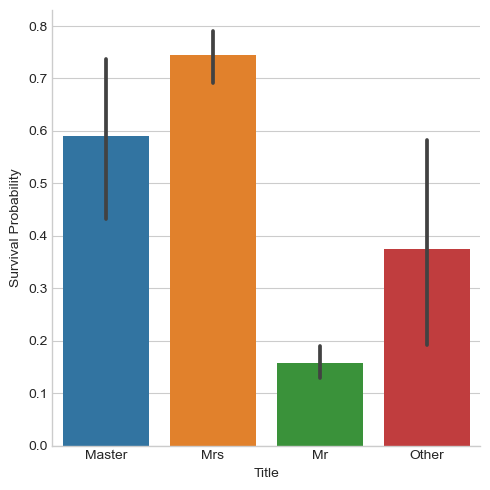

In [57]:
# Assuming train_df is your DataFrame containing the data
g = sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [58]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True) #artık name kullanmama gerek kalmadı 
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [59]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [60]:
# Family Size Feature Engineeing 

train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1   # 1 neden ekledik 0+0 family olmaz o yüzden


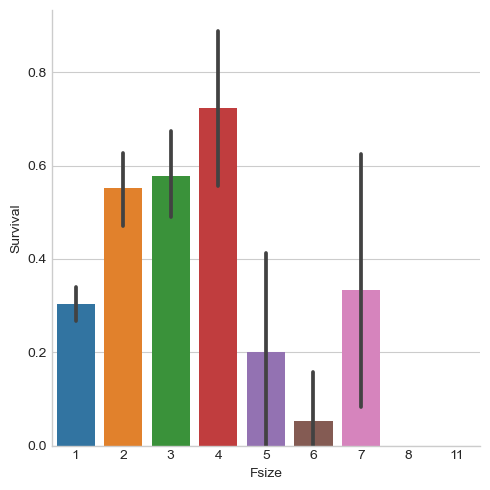

In [61]:

# Assuming train_df is your DataFrame containing the data
g = sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()


In [62]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


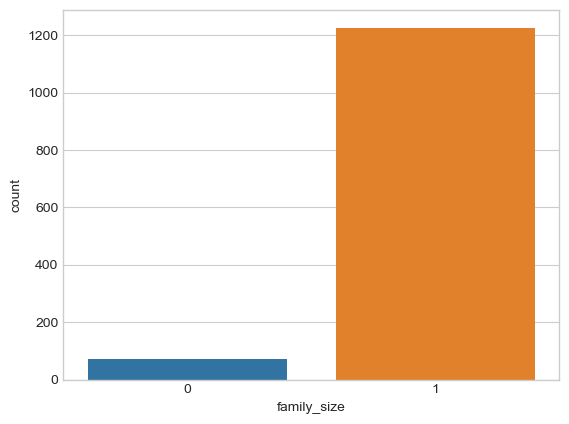

In [63]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

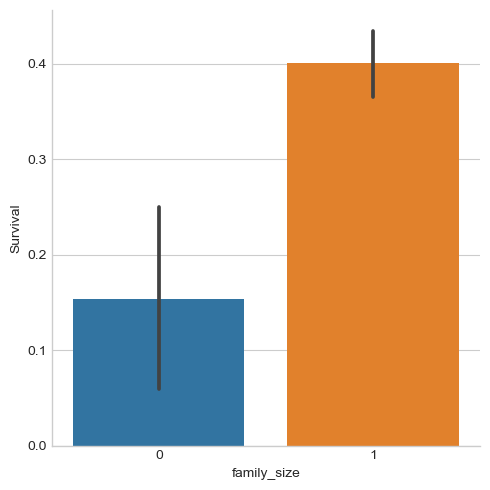

In [64]:
# Assuming train_df is your DataFrame containing the data
g = sns.catplot(x="family_size", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()


Small familes have more chance to survive than large families.



In [65]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


In [66]:
#Embarked Feature Engineering

train_df["Embarked"].head()  #Hangi liman?

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

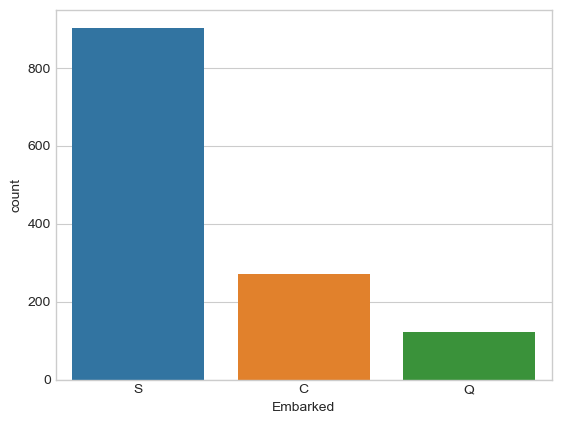

In [67]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [68]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [69]:
# Ticker Feature Engineering

train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [70]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [71]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [72]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [73]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


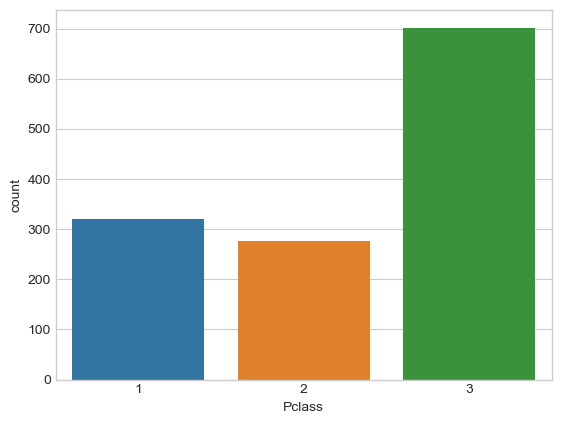

In [74]:
#Pclass Feature Engineering
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [75]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


In [76]:
#Sex Feature Engineering

train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


# Drop Passenger ID and Cabin


Kullanmak istemeyeceğimiz featureları çıkaralım

In [77]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

# Modeling

In [78]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train-Test Split

In [79]:
train_df

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,1.0,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0.0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,NaN,25.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
1295,NaN,39.0,0,0,108.9000,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
1296,NaN,38.5,0,0,7.2500,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
1297,NaN,25.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1


In [80]:
train_df_len

881

In [81]:
test = train_df[train_df_len:]  #881 sonraki satırları test verisi olarak al
test.drop(labels = ["Survived"],axis = 1, inplace = True)  # ama survived çıkar bu b izim bağımlı değişkenimiz
test   #ayrı bir test verisi oluşturduk

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,25.0,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1295,39.0,0,0,108.9000,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
1296,38.5,0,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1297,25.0,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [82]:
train = train_df[:train_df_len] #ilk 881 veriyi al
X_train = train.drop(labels = "Survived", axis = 1)  # X de survived alma geri kalanı eğitim verisi olarak kullan
y_train = train["Survived"] # y ise bağımlı değişken sadece survived al
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


# Simple Logistic Regression

In [83]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 82.71
Testing Accuracy: % 81.79


# Hyperparameter Tuning -- Grid Search -- Cross Validation


We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

Decision Tree

SVM

Random Forest

KNN

Logistic Regression

In [97]:
random_state = 42

classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             KNeighborsClassifier(),
             LogisticRegression(random_state = random_state)]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   knn_param_grid,
                   logreg_param_grid]

In [98]:
#GridSearchCV Cross Validation CV-Cross Validaion

crossvalidation_result=[]
best_estimators = [] #en iyi model olanı seçecek
for i in range(len(classifier)):
    # en iyi model ve parametreleri
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    crossvalidation_result.append(clf.best_score_)#en iyi score tutar
    best_estimators.append(clf.best_estimator_)#en iyi parametreyi tutar
    print(crossvalidation_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.840677966101695
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^

             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/utils/_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammet

0.7694915254237288
Fitting 10 folds for each of 14 candidates, totalling 140 fits


 alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

0.8186440677966103


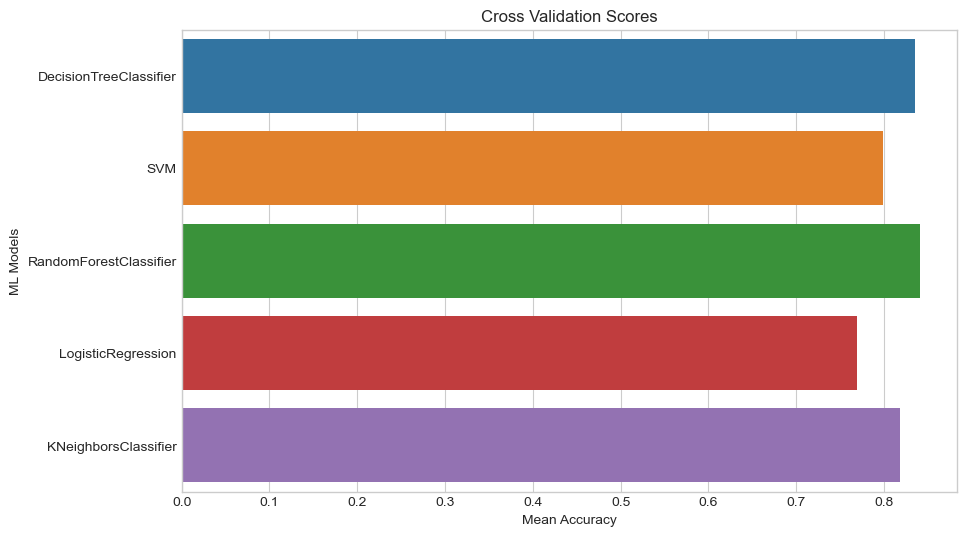

In [104]:
# Create DataFrame
crossvalidation_result = pd.DataFrame({"Cross Validation Means": cv_result,
                                       "ML Models": ["DecisionTreeClassifier", "SVM",
                                                     "RandomForestClassifier", "LogisticRegression",
                                                     "KNeighborsClassifier"]})

plt.figure(figsize=(10, 6))
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=crossvalidation_result)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

plt.show()


# Ensemble Modeling


In [107]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.8247422680412371


VotingClassifier, scikit-learn kütüphanesinde bulunan bir ensemble öğrenme yöntemidir. Birden fazla bireysel sınıflandırıcıyı bir araya getirir ve tahminlerini çoğunluk oyuyla (sınıflandırma görevleri için) veya ortalama (regresyon görevleri için) ile birleştirir. Bu, model ortalaması olarak da bilinir.

# Prediction and Submission


In [110]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)